In [2]:
import konlpy

In [4]:
!pip install xmltodict

In [6]:
!pip install beautifulsoup4

In [48]:
url = 'http://apis.data.go.kr/1170000/law/lawSearchList.do?\
serviceKey=22Nn4Pf%2BappHSmLc8TsnR7KrSDh2oLZY%2BKUO%2Fk%2BAzsebJsWWxNqAafz3Y4c1t7SVy6SUTa2qvXNdbIwBzIvhrQ%3D%3D&\
target=law&query=*&numOfRows=10000&pageNo=1'

import requests
from bs4 import BeautifulSoup as bs
import xmltodict

In [49]:
req = requests.get(url).content
xmlobject = xmltodict.parse(req)
xmlobject['LawSearch']['law']

[{'@id': '1',
  '법령일련번호': '232157',
  '현행연혁코드': '현행',
  '법령명한글': '10ㆍ27법난 피해자의 명예회복 등에 관한 법률',
  '법령약칭명': '10ㆍ27법난법',
  '법령ID': '010719',
  '공포일자': '20210518',
  '공포번호': '18146',
  '제개정구분명': '일부개정',
  '소관부처코드': '1371000',
  '소관부처명': '문화체육관광부',
  '법령구분명': '법률',
  '시행일자': '20210518',
  '자법타법여부': None,
  '법령상세링크': '/DRF/lawService.do?OC=sapphire_5&target=law&MST=232157&type=HTML&mobileYn=&efYd=20210518'},
 {'@id': '2',
  '법령일련번호': '235703',
  '현행연혁코드': '현행',
  '법령명한글': '10ㆍ27법난 피해자의 명예회복 등에 관한 법률 시행령',
  '법령약칭명': '10ㆍ27법난법시행령',
  '법령ID': '010831',
  '공포일자': '20210929',
  '공포번호': '32018',
  '제개정구분명': '타법개정',
  '소관부처코드': '1371000',
  '소관부처명': '문화체육관광부',
  '법령구분명': '대통령령',
  '시행일자': '20210929',
  '자법타법여부': None,
  '법령상세링크': '/DRF/lawService.do?OC=sapphire_5&target=law&MST=235703&type=HTML&mobileYn=&efYd=20210929'},
 {'@id': '3',
  '법령일련번호': '236231',
  '현행연혁코드': '현행',
  '법령명한글': '119구조ㆍ구급에 관한 법률',
  '법령약칭명': '119법',
  '법령ID': '011349',
  '공포일자': '20211019',
  '공포번호': '18487',
  '제개정구분명': '일부

In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame(xmlobject['LawSearch']['law'])
df.head()

,@id,법령일련번호,현행연혁코드,법령명한글,법령약칭명,법령ID,공포일자,공포번호,제개정구분명,소관부처코드,소관부처명,법령구분명,시행일자,자법타법여부,법령상세링크
0,1,232157,현행,10ㆍ27법난 피해자의 명예회복 등에 관한 법률,10ㆍ27법난법,010719,20210518,18146,일부개정,1371000,문화체육관광부,법률,20210518,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
1,2,235703,현행,10ㆍ27법난 피해자의 명예회복 등에 관한 법률 시행령,10ㆍ27법난법시행령,010831,20210929,32018,타법개정,1371000,문화체육관광부,대통령령,20210929,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
2,3,236231,현행,119구조ㆍ구급에 관한 법률,119법,011349,20211019,18487,일부개정,1661000,소방청,법률,20220120,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
3,4,236155,현행,119구조ㆍ구급에 관한 법률 시행령,119법시행령,011452,20211019,32070,일부개정,1661000,소방청,대통령령,20220106,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
4,5,243963,현행,119구조ㆍ구급에 관한 법률 시행규칙,119법시행규칙,011457,20220721,00345,일부개정,1661000,소방청,행정안전부령,20220721,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...


In [17]:
target = df['법령명한글'].values #배열
title_list = target.tolist() #리스트로 변환
text = ' '.join(title_list)
text

'10ㆍ27법난 피해자의 명예회복 등에 관한 법률 10ㆍ27법난 피해자의 명예회복 등에 관한 법률 시행령 119구조ㆍ구급에 관한 법률 119구조ㆍ구급에 관한 법률 시행령 119구조ㆍ구급에 관한 법률 시행규칙 1945년이후종전의규정에의한학교졸업자자격인정령 1959년 12월 31일 이전에 퇴직한 군인의 퇴직급여금지급에 관한 특별법 1959년 12월 31일 이전에 퇴직한 군인의 퇴직급여금지급에 관한 특별법 시행령 1980년해직공무원의보상등에관한특별조치법 1980년해직공무원의보상등에관한특별조치법시행령 1인 창조기업 육성에 관한 법률 1인 창조기업 육성에 관한 법률 시행령 2018 평창 동계올림픽대회 및 동계패럴림픽대회 지원 등에 관한 특별법 2018 평창 동계올림픽대회 및 동계패럴림픽대회 지원 등에 관한 특별법 시행령 2023 새만금 세계스카우트잼버리 지원 특별법 2023 새만금 세계스카우트잼버리 지원 특별법 시행령 2023 순천만국제정원박람회 지원 및 사후활용에 관한 특별법 2023 순천만국제정원박람회 지원 및 사후활용에 관한 특별법 시행령 2030 부산세계박람회 유치위원회의 설치 및 운영에 관한 규정 30개월 이상 복무한 상등병 만기전역자의 특별진급을 위한 특별법 30개월 이상 복무한 상등병 만기전역자의 특별진급을 위한 특별법 시행령 3ㆍ15의거 참여자의 명예회복 등에 관한 법률 3ㆍ15의거 참여자의 명예회복 등에 관한 법률 시행령 4ㆍ16세월호참사 진상규명 및 안전사회 건설 등을 위한 특별법 4ㆍ16세월호참사 진상규명 및 안전사회 건설 등을 위한 특별법 시행령 4ㆍ16세월호참사 피해구제 및 지원 등을 위한 특별법 4ㆍ16세월호참사 피해구제 및 지원 등을 위한 특별법 시행령 4차산업혁명위원회의 설치 및 운영에 관한 규정 5ㆍ18민주유공자예우 및 단체설립에 관한 법률 5ㆍ18민주유공자예우 및 단체설립에 관한 법률 시행령 5ㆍ18민주유공자예우 및 단체설립에 관한 법률 시행규칙 5ㆍ18민주화운동 관련자 보상 등에 관한 법률 5ㆍ18민주화운동 관련자 보상 등에 관한 법률

In [19]:
import re
text = re.sub('[^가-힣]+',' ', text)
print(len(text))
text[:100]

96156


' 법난 피해자의 명예회복 등에 관한 법률 법난 피해자의 명예회복 등에 관한 법률 시행령 구조 구급에 관한 법률 구조 구급에 관한 법률 시행령 구조 구급에 관한 법률 시행규칙 년이후'

In [23]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(text)
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word)>1):
        noun_list.append(word)
print(morph)
print(noun_list)

['법난', '피해자', '명예', '회복', '법률', '법난', '피해자', '명예', '회복', '법률', '시행', '구조', '구급', '법률', '구조', '구급', '법률', '시행', '구조', '구급', '법률', '시행', '규칙', '이후', '종전', '규정', '학교', '졸업', '자격', '정령', '이전', '퇴직', '군인', '퇴직', '금지', '특별법', '이전', '퇴직', '군인', '퇴직', '금지', '특별법', '시행', '해직', '공무원', '보상', '특별', '조치', '해직', '공무원', '보상', '특별', '조치', '시행', '창조', '기업', '육성', '법률', '창조', '기업', '육성', '법률', '시행', '평창', '동계올림픽', '대회', '동계', '패럴림픽', '대회', '지원', '특별법', '평창', '동계올림픽', '대회', '동계', '패럴림픽', '대회', '지원', '특별법', '시행', '새만금', '세계', '스카우트', '잼버리', '지원', '특별법', '새만금', '세계', '스카우트', '잼버리', '지원', '특별법', '시행', '순천만', '국제', '정원', '박람회', '지원', '사후', '활용', '특별법', '순천만', '국제', '정원', '박람회', '지원', '사후', '활용', '특별법', '시행', '부산', '세계박람회', '유치', '위원회', '설치', '운영', '규정', '개월', '이상', '복무', '상등병', '전역', '특별', '진급', '특별법', '개월', '이상', '복무', '상등병', '전역', '특별', '진급', '특별법', '시행', '의거', '참여자', '명예', '회복', '법률', '의거', '참여자', '명예', '회복', '법률', '시행', '세월호', '참사', '진상', '규명', '안전', '사회', '건설', '특별법', '세월호', '참사', '진상', '규명', '안전', '사회'

In [24]:
from collections import Counter
one_word = []
for word, tag in morph:
    if (tag == 'Noun') & (len(word)==1):
        one_word.append(word)
one_dict = dict(Counter(one_word).most_common())
keys = sorted(one_dict.items(), key=lambda x:x[1], reverse=True)
keys[:10]


[('관', 2398),
 ('령', 1496),
 ('법', 1450),
 ('및', 1257),
 ('등', 743),
 ('위', 146),
 ('그', 100),
 ('군', 37),
 ('제', 37),
 ('업', 36)]

In [38]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font', family = 'Malgun Gothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False #마이너스 부호 출력 설정

count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])
df10 = df.sort_values(by='cnt', ascending = False)[:10]
df10.reset_index(inplace=True)
df10

,index,cnt
0,시행,2445
1,규칙,1754
2,법률,1481
3,관리,535
4,지원,364
5,규정,327
6,특별법,318
7,진흥,284
8,산업,276
9,운영,247


<AxesSubplot:xlabel='index', ylabel='cnt'>

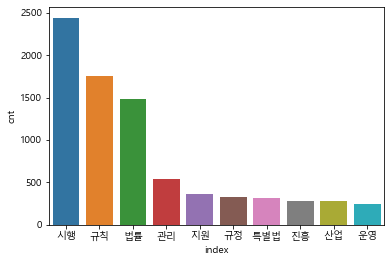

In [27]:
sns.barplot(x = 'index', y = 'cnt', data = df10, orient = 'v')

In [28]:
!pip install wordcloud

(-0.5, 1499.5, 999.5, -0.5)

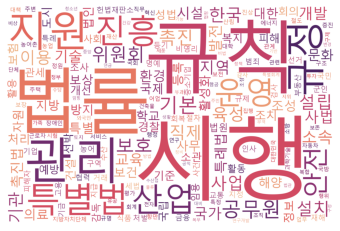

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color = 'white',
                     colormap = 'flare', width=1500, height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')


#### 과제 0722_1
관심있는 카테고리 text데이터를 웹에서 가져와서 시각화하세요.(bar, wordcloud 등등)